In [1]:
import os
os.chdir("/home/hellsdeur/Documents/ufpa/cbcc/2021.4/meta/provas/ag-cvrp/")
print(os.getcwd())

/Files/Documents/ufpa/cbcc/2021.4/meta/provas/ag-cvrp


In [2]:
import json
import folium

from src.depot import Depot
from src.ga import GeneticAlgorithm, MeanBehavior

In [3]:
depot = Depot("https://raw.githubusercontent.com/ronaldcuri/meta-cvrpy/main/data/cvrp_castanhal.json")

In [4]:
ga = GeneticAlgorithm(
    f=depot.f,
    individuals=depot.deliveries,
    k=5,
    minmax="min",
    selection="steady"
)

In [5]:
mb = MeanBehavior(
    ga=ga,
    n_run=10,
    mutation_rate=0.1,
    generations=100
)

In [6]:
mb.process()

Execução 1/10
Chromosomes: 5	|	1	|	3	|	16	|	27	|	23	|	12	|	14	|	15	|	25	|	10	|	29	|	20	|	4	|	19	|	30	|	32	|	24	|	21	|	28	|	13	|	33	|	18	|	26	|	11	|	7	|	34	|	17	|	8	|	31	|	6	|	2	|	9	|	22	|	35
Fitness: 302644.9
Execução 2/10
Chromosomes: 35	|	32	|	16	|	8	|	14	|	22	|	27	|	18	|	10	|	24	|	20	|	6	|	2	|	1	|	4	|	30	|	19	|	28	|	12	|	13	|	25	|	7	|	21	|	17	|	34	|	29	|	15	|	33	|	26	|	23	|	9	|	11	|	31	|	5	|	3
Fitness: 230391.3
Execução 3/10
Chromosomes: 4	|	24	|	22	|	32	|	9	|	10	|	29	|	19	|	25	|	27	|	12	|	28	|	5	|	6	|	1	|	2	|	3	|	17	|	34	|	35	|	8	|	11	|	30	|	20	|	7	|	18	|	31	|	16	|	15	|	13	|	26	|	14	|	21	|	33	|	23
Fitness: 244544.9
Execução 4/10
Chromosomes: 18	|	32	|	14	|	26	|	24	|	22	|	1	|	3	|	23	|	11	|	28	|	7	|	35	|	30	|	4	|	10	|	5	|	2	|	6	|	19	|	16	|	29	|	15	|	17	|	33	|	21	|	8	|	9	|	25	|	13	|	31	|	34	|	20	|	27	|	12
Fitness: 303209
Execução 5/10
Chromosomes: 27	|	9	|	15	|	29	|	28	|	33	|	26	|	11	|	31	|	7	|	8	|	21	|	18	|	12	|	10	|	16	|	23	|	34	|	3	|	6	|	2	|	5	|	1	|	35	|	25	|	17	|	19	|	24	|	14	|	30

In [7]:
description = mb.describe()

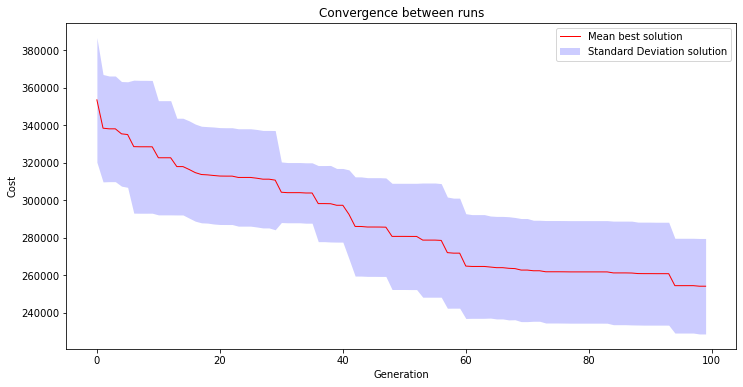

In [8]:
mb.plot(description)

In [9]:
best = mb.run_list[0].gbest_list[-1]
for i in range(1, len(mb.run_list)):
    if mb.run_list[i].gbest_list[-1].fitness < best.fitness:
        best = mb.run_list[i].gbest_list[-1]

depot.f(best.chromosome, save=True)

230391.3

In [10]:
with open('results/best_route_cvrp.json', 'r') as outfile:
    data = json.load(outfile)
    #pontos de rota
    waypoints = data['waypoints']
    hints = [waypoints[i]['hint'] for i in range(len(waypoints))]
    geometrys = [waypoints[i]['location'] for i in range(len(waypoints))]
    geometrys = [[geometrys[i][1], geometrys[i][0]] for i in range(len(geometrys))]
    #distâncias entre cada ponto de rota
    legs = data['routes'][0]['legs']
    distances_legs = [legs[i]['distance'] for i in range(len(legs))]
#pontos da rota em que são o depósito
indexs_origin = [i for i in range(len(waypoints)) if waypoints[i]['hint'] == 0]

In [11]:
print(f'Quantidades de rotas calculadas: {len(indexs_origin)-1}')
for i in range(len(indexs_origin)-1):
    peso = 0
    rota = ''
    for hint in hints[indexs_origin[i]+1:indexs_origin[i+1]]:
        peso += depot.deliveries[hint-1].size
        rota += f' -> {hint}'
    print(f'\nRota {i+1}: 0' + rota + f' -> 0')
    print(f'Peso máximo atingido: {peso}kg')
    distance_route = sum(distances_legs[indexs_origin[i]:indexs_origin[i+1]])
    print(f'Distância: {distance_route:.2f}km')

Quantidades de rotas calculadas: 2

Rota 1: 0 -> 35 -> 32 -> 16 -> 8 -> 14 -> 22 -> 27 -> 18 -> 10 -> 24 -> 20 -> 6 -> 2 -> 1 -> 4 -> 30 -> 19 -> 28 -> 12 -> 13 -> 25 -> 7 -> 21 -> 17 -> 34 -> 29 -> 15 -> 33 -> 26 -> 23 -> 9 -> 11 -> 0
Peso máximo atingido: 177kg
Distância: 159631.30km

Rota 2: 0 -> 31 -> 5 -> 3 -> 0
Peso máximo atingido: 17kg
Distância: 70760.00km


In [12]:
#intanciando mapa
tiles = ['OpenStreetMap','CartoDB positron','Stamen toner','Stamen Terrain']
mapa = folium.Map(location=geometrys[0], zoom_start=12, tiles=tiles[1])

#marcador de cada ponto da rota
for i in range(len(geometrys)):
    folium.Marker(geometrys[i], popup=f'Ponto {hints[i]}').add_to(mapa)

#marcador do depósito, ponto incial/final
folium.CircleMarker(geometrys[0], radius=10, popup='Depósito', color='red', fill=True).add_to(mapa)

color = ['red', 'blue', 'green', 'yellow', 'black', 'purple', 'orange', 'brown', 'pink', 'gray']
#criar linhas poligonais entre as rotas
for i in range(len(indexs_origin)-1):
    folium.PolyLine(geometrys[indexs_origin[i]:indexs_origin[i+1]+1], color=color[i], weight=2, opacity=0.7).add_to(mapa)

mapa

In [13]:
#salvar mapa
mapa.save('results/mapa_cvrp.html')